# User Churn Prediction 

<p>Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.</p>
<style>
    p::first-letter {
        font-size: 200%;
    }
</style>

## Data Exploration

### Raw Data

<ul style="visibility:hidden">
    <li>Data Source: https://www.sgi.com/tech/mlc/db/churn.all</li>
    <li>Data info: https://www.sgi.com/tech/mlc/db/churn.names</li>
</ul>

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('data/churn.all')

In [2]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
print('Number of rows:\t\t%d' % churn_df.shape[0])
print('Number of columns:\t%d' % churn_df.shape[1])

Number of rows:		5000
Number of columns:	21


### Data Cleaning

remove extra whitespace

In [4]:
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [5]:
for c in churn_df.columns:
    if (str(churn_df[c][0])[0] == ' ' or str(churn_df[c][0])[-1] == ' '):
        print(c)

phone_number
intl_plan
voice_mail_plan
churned


In [6]:
for c in churn_df.columns:
    print(c)
    print(churn_df[c][0])

state
KS
account_length
128
area_code
415
phone_number
 382-4657
intl_plan
 no
voice_mail_plan
 yes
number_vmail_messages
25
total_day_minutes
265.1
total_day_calls
110
total_day_charge
45.07
total_eve_minutes
197.4
total_eve_calls
99
total_eve_charge
16.78
total_night_minutes
244.7
total_night_calls
91
total_night_charge
11.01
total_intl_minutes
10.0
total_intl_calls
3
total_intl_charge
2.7
number_customer_service_calls
1
churned
 False.


In [7]:
def removeSpace(df) :
    lc = list()
    for c in df.columns:
        s = str(df[c][0])
        if (s[0] == ' ' or s[-1] == ' ' ):
            lc.append(c)
    for c in lc:
        df[c] = df[c].map(lambda x: x.strip())
    

In [8]:
removeSpace(churn_df)

In [9]:
# not ready to remove 

churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Features

/home/c830g420/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


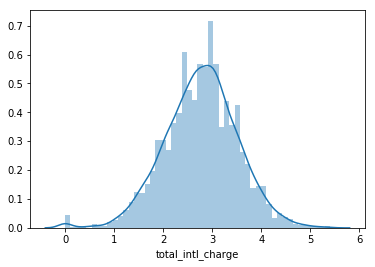

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=True)

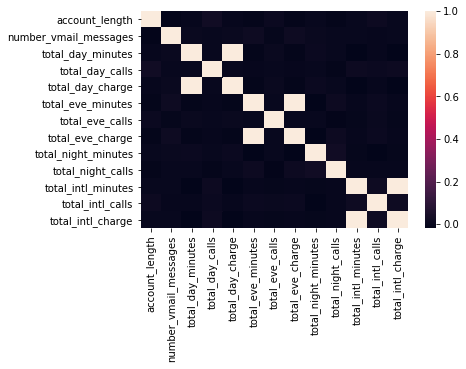

In [11]:
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()
sb.heatmap(corr)

In [12]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368


In [13]:
from scipy.stats import pearsonr

print (pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])[0])

0.005381375960654535


### Feature Processing

In [14]:
y = np.where(churn_df['churned'] == 'True.', 1, 0)

In [15]:
y[::50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [16]:
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'


In [17]:
churn_feat_space.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [18]:
X = churn_feat_space.values.astype(np.float)

In [19]:
# churn_feat_space.values

In [20]:
# churn_feat_space.values.astype(np.float)

In [21]:
# X

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print('Feature space holds %d observations and %d features' % X.shape)
print('Unique target labels:', np.unique(y))

Feature space holds 5000 observations and 17 features
Unique target labels: [0 1]


In [23]:
# np.unique(np.array([1,2,3,4,5,6,7,7,7,7,8,8,9,9,9]))

# Model Training and Result Evaluation

## K-fold Cross-Validation

In [24]:
from sklearn.model_selection import KFold

def run_cv(X, y, clf_class, **kwargs) :
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    
    for train, test in kf.split(X) :
        X_train, X_test = X[train], X[test]
        y_train = y[train]
        
        clf.fit(X_train, y_train)
        y_pred[test] = clf.predict(X_test)
    
    return y_pred
    
    

## Supervised Learning Models and Calculate Accuracy

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def accuracy(y_true, y_pred) :
    return np.mean(y_true == y_pred)


In [26]:
LR_CV_result = run_cv(X, y, LogisticRegression)
RF_CV_result = run_cv(X, y, RandomForestClassifier)
KNN_CV_result = run_cv(X, y, KNeighborsClassifier)
SVM_CV_result = run_cv(X, y, SVC)

In [27]:
# clfss = KNeighborsClassifier()

In [28]:
# xia = clfss.fit([[10],[20],[39],[43],[5],[7],[4]],[0,1,1,1,0,0,0])

In [29]:
# xia.predict([[32], [3], [1]])

In [30]:
# clf_class(LogisticRegression)

In [31]:
print('Logistic Regression (L2 is default): \t%.4f' 
      % accuracy(y, LR_CV_result))
print('Random Forest: \t%.4f' 
     % accuracy(y, RF_CV_result))
print('K-nearest-neighbors: \t%.4f' 
     % accuracy(y, KNN_CV_result))
print('SVM : \t%.4f' 
     % accuracy(y, SVM_CV_result))

Logistic Regression (L2 is default): 	0.8656
Random Forest: 	0.9510
K-nearest-neighbors: 	0.8990
SVM : 	0.9304


## Grid Search to Find Optimal Parameters

### Finding Optimal Parameters: LogisticRegression

In [32]:
def print_grid_search_metrics(gs) :
    print('Best score: %.3f' % gs.best_score_)
    print('Best parameters set:')
    best_parameters = gs.best_params_
    
    for param_name in sorted(parameters.keys()) :
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ('l1', 'l2'),
    'C': (1, 2, 5, 10)
}

Grid_LR = GridSearchCV(
    LogisticRegression(), parameters, cv=5, verbose=1, refit=False)
Grid_LR.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 2, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=1)

In [34]:
print_grid_search_metrics(Grid_LR)

Best score: 0.865
Best parameters set:
	C: 1
	penalty: 'l1'


In [35]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    LogisticRegression(C=1, penalty='l1'),
    X, y, cv=5
)

print('Logistic Regression 5-fold cross validation accuracy: \t%.20f'
     % np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 	0.86520169180169193002


### Finding Optimal Parameters: KNN

In [38]:
# from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': [3, 5, 7, 10]
}

Grid_KNN = GridSearchCV(
    KNeighborsClassifier(), parameters, cv=5, verbose=1, refit=False)
Grid_KNN.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   16.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=False, return_train_score='warn', scoring=None, verbose=1)

In [39]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.900
Best parameters set:
	n_neighbors: 5


In [41]:
# from sklearn.model_selection import cross_val_score

score = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                        X, y, cv=5)
print('5-fold cross validation accuracy : \t%.20f' % np.mean(score))

5-fold cross validation accuracy : 	0.90040212060212065914


## Calculate Confusion Matrix
### Precision, Recall, Accuracy

#### <div align=center>Confusion Matrix</div>

<div align=center>https://en.wikipedia.org/wiki/Confusion_matrix</div>

<table style="font-size: 120%;">
    <tr>
        <td 
            style="background:white; border:none"
            colspan=2>
        </td>
        <th colspan=2 
            style="font-size: 15px">
            True condition
        </th>
    </tr>
    <tr style="background:#eaecf0">
        <td 
            style="background:white; border:none"
            colspan=2>
        </td>
        <th>True</th>
        <th>False</th>
    </tr>
    <tr>
        <th 
            rowspan=2 style="font-size: 15px">
            Predicted<br>condition
        </th>
        <th style="background:#eaecf0">True</th>
        <td style="background: #ffffff">True positive</td>
        <td style="background: #ffffff">
            False positive
            <div style="font-size: 10px; color: #aa5555">
                Type I error
            </div>
        </td>
    </tr>
    <tr>
        <th style="background:#eaecf0">False</th>
        <td>
            False negative
            <div style="font-size: 10px; color: #aa5555">
                Type II error
            </div>
        </td>
        <td>True negative</td>
    </tr>
</table>

**precision** or **positive predictive rate (PPV)**:
<p>
$$precision = \frac{true\ positive}{true\ positive + false\ positive}$$
</p>
<p>
$$PPV = \frac{TP}{TP + FP}$$
</p>
<br><br>
**recall**, **sensitivity**, **hit rate** or **true positive rate (TPR)**:
<p>
$$recall = \frac{true\ positive}{true\ positive + false\ negative}$$
</p>
<p>
$$TPR = \frac{TP}{TP + FN}$$
</p>
<br><br>
**accuracy(ACC)**:
<p>
$$ACC = \frac{TP +TN}{TP + TN + FP + FN}$$
</p>

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm) :
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp + tn) / (tp + tn + fp + fn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print('Accuracy is \t%.10f' % accuracy)
    print('Precision is \t%.10f' % precision)
    print('Recall is \t%.10f' % recall)
    
def draw_confusion_matrices(confusion_matrices, class_names) :
    class_names = ['Not', 'Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(
            cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Random Forest
Accuracy is 	0.9510000000
Precision is 	0.9342105263
Recall is 	0.7029702970


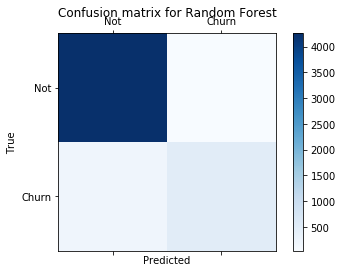

K-Nearest-Neighbors
Accuracy is 	0.8990000000
Precision is 	0.8216560510
Recall is 	0.3649222065


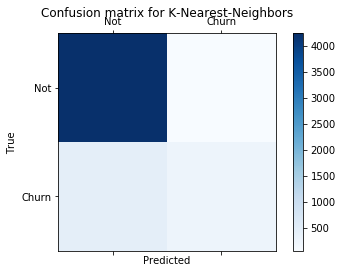

Logisitic Regression
Accuracy is 	0.8656000000
Precision is 	0.5702811245
Recall is 	0.2008486563


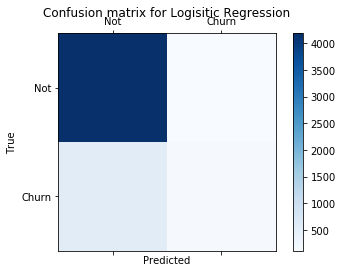

In [52]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result))
]

draw_confusion_matrices(confusion_matrices, class_names)

# Feature Selection

## Logistic Regression Model: Feature Selection

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

### Compare Feature Coefficients

In [56]:
LRmodel_l1 = LogisticRegression(penalty='l1')
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print('Logistic Regression (L1) Coefficients')
for k,v in sorted(
    zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), 
        churn_feat_space.columns), 
    key=lambda k_v: (-abs(k_v[0]), k_v[1])) :
    print(v + ': \t' + str(k))

Logistic Regression (L1) Coefficients
voice_mail_plan: 	-0.8656
number_customer_service_calls: 	0.673
total_day_minutes: 	0.6706
intl_plan: 	0.613
number_vmail_messages: 	0.3959
total_eve_charge: 	0.2889
total_intl_calls: 	-0.1743
total_night_charge: 	0.1551
total_intl_charge: 	0.1379
total_intl_minutes: 	0.1055
total_eve_minutes: 	0.0689
total_day_charge: 	0.0638
account_length: 	0.0534
total_day_calls: 	0.0495
total_night_minutes: 	0.0466
total_night_calls: 	-0.0288
total_eve_calls: 	-0.0284


In [57]:
LRmodel_l2 = LogisticRegression(penalty='l2')
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print('Logistic Regression (L2) Coefficients')
for k,v in sorted(
    zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), 
        churn_feat_space.columns), 
    key=lambda k_v: (-abs(k_v[0]), k_v[1])) :
    print(v + ': \t' + str(k))

Logistic Regression (L2) Coefficients
voice_mail_plan: 	-0.8929
number_customer_service_calls: 	0.6731
intl_plan: 	0.6132
number_vmail_messages: 	0.4234
total_day_minutes: 	0.3687
total_day_charge: 	0.3664
total_eve_charge: 	0.18
total_eve_minutes: 	0.1794
total_intl_calls: 	-0.1761
total_intl_charge: 	0.1235
total_intl_minutes: 	0.1217
total_night_minutes: 	0.1028
total_night_charge: 	0.1008
account_length: 	0.0552
total_day_calls: 	0.0513
total_night_calls: 	-0.0307
total_eve_calls: 	-0.0304


### Recursive Feature Elimination (RFE)

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [61]:
from sklearn.feature_selection import RFE

rfe_l1 = RFE(LRmodel_l1, n_features_to_select=1)
rfe_l1.fit(X, y)
print('Logistic Regression (L1) RFE Result')
for k,v in sorted(
    zip(map(lambda x: round(x, 4), rfe_l1.ranking_), 
        churn_feat_space.columns)):
    print(v + ': \t' + str(k))

Logistic Regression (L1) RFE Result
total_day_minutes: 	1
number_customer_service_calls: 	2
intl_plan: 	3
voice_mail_plan: 	4
number_vmail_messages: 	5
total_eve_charge: 	6
total_intl_charge: 	7
total_night_minutes: 	8
total_day_charge: 	9
total_intl_calls: 	10
total_eve_minutes: 	11
account_length: 	12
total_intl_minutes: 	13
total_day_calls: 	14
total_night_calls: 	15
total_eve_calls: 	16
total_night_charge: 	17


In [62]:
# from sklearn.feature_selection import RFE

rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1)
rfe_l2.fit(X, y)
print('Logistic Regression (L2) RFE Result')
for k,v in sorted(
    zip(map(lambda x: round(x, 4), rfe_l2.ranking_), 
        churn_feat_space.columns)):
    print(v + ': \t' + str(k))

Logistic Regression (L2) RFE Result
total_day_minutes: 	1
number_customer_service_calls: 	2
intl_plan: 	3
voice_mail_plan: 	4
number_vmail_messages: 	5
total_day_charge: 	6
total_eve_charge: 	7
total_intl_charge: 	8
total_night_minutes: 	9
total_eve_minutes: 	10
total_intl_calls: 	11
total_intl_minutes: 	12
total_night_charge: 	13
account_length: 	14
total_day_calls: 	15
total_night_calls: 	16
total_eve_calls: 	17


## Random Forest Model: Feature Importance

In [ ]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

print('Feature importance ranking by Random Forest Model: ')
for k,v in sorted(
    zip(map(lambda x: xround(x, 4), importances), 
        churn_feat_space_columns), 
    reverse=True)